# Instalação/importação de bibliotecas e Leitura da base

**Bibliotecas**

In [2]:
%pip install -q pandas numpy sklearn yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics, svm
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report, precision_recall_curve, auc, roc_curve

from xgboost import XGBRFClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

**Leitura da base**

Lembre-se de fazer upload da base (disponível no Drive) na pasta "sample_data"

In [4]:
df = pd.read_csv("./content/sample_data/survey.csv", sep=",", header=0)

In [5]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


# Atributos da base de dados

* **Timestamp**: Horário em que a pesquisa foi submetida
* **Age**: Idade da pessoa
* **Gender**: Gênero da pessoa
* **Country**: País de origem da pessoa
* **state:** Estado dos EUA, se for dos EUA
* **self_employed:** Você trabalha por conta própria?
* **family_history:** Você tem histórico familiar de doenças mentais?
* **treatment:** Você já procurou tratamento para uma doença mental?
* **work_interfere:** Se você tem uma doença mental, você acha que isso interfere com seu trabalho?
* **no_employees:** Quantos funcionários trabalham na sua empresa ou organização?
* **remote_work:** Você trabalha mais de 50% do tempo remotamente?
* **tech_company:** Sua empresa é uma empresa de tecnologia / informática?
* **benefits:** Sua empresa oferece benefícios de saúde mental?
* **care_options:** Sua empresa oferece opções de cuidados de saúde mental?
* **wellness_program:** Sua empresa tem um programa de bem-estar que aborda saúde mental?
* **seek_help:** Sua empresa fornece recursos para procurar ajuda para questões de saúde mental?
* **anonymity:** Você tem a opção de permanecer anônimo se você optar por tirar licença médica para questões de saúde mental?
* **leave:** A política de licença médica da sua empresa é amigável para pessoas com problemas de saúde mental?
* **mentalhealthconsequence:** Você acha que discutir um problema de saúde mental com seu empregador teria consequências negativas?
* **physhealthconsequence:** Você acha que discutir um problema de saúde física com seu empregador teria consequências negativas?
* **coworkers:** Você estaria disposto a discutir um problema de saúde mental com seus colegas de trabalho?
* **supervisor:** Você estaria disposto a discutir um problema de saúde mental com seu supervisor(es) direto(s)?
* **mental_health_interview:** Você estaria disposto a discutir um problema de saúde mental com seu empregador em uma entrevista?
* **physhealthinterview:** Você estaria disposto a discutir um problema de saúde física com seu empregador em uma entrevista?
* **mentalvsphysical:** Com que frequência você acha que os problemas de saúde mental e física são tratados de forma igual em sua empresa?
* **obs_consequence:** Você já ouviu falar de um colega de trabalho que foi demitido ou deixou uma empresa por causa de problemas de saúde mental?
* **comments:** Quaisquer comentários adicionais ou observações

# Tratamento dos dados

**Remoção de atributos desnecessários**

Alguns dos atributos não fornecem informações relevantes e foram removidos.

In [6]:
df.drop(columns=['Timestamp', 'comments', 'state'], inplace = True)

**Considerações sobre o atributo "Idade"**

Idades precisam estar entre 15 e 100 anos.
Idades fora desse intervalo serão removidas.

In [7]:
df.drop(df[df['Age'] <= 15].index, inplace = True)
df.drop(df[df['Age'] > 100].index, inplace = True)

**Considerações sobre o atributo "Gênero"**

Diversidade de respostas presentes na base, sem uma padronização. Esses dados foram tratados e colocados dentro do seguinte padrão:
* Homem: nascido homem e se identifica como homem.
* Mulher: nascido mulher e se identifica como mulher.
* Outro: qualquer gênero que não se encaixar nas duas definições acima.

In [8]:
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

df['Gender'].value_counts()

Gender
Male      986
Female    247
Other      18
Name: count, dtype: int64

**Valores nulos**

Identificados em dois atributos:
* work_infere: representam apenas 20% dos dados, então vamos substituir por "Unknown".
* self_employed: representam apenas 1.4% dos dados, então vamos substituir por "No".

In [9]:
df.isnull().sum()

Age                            0
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               262
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [10]:
df['work_interfere'] = df['work_interfere'].fillna('Unknown')
print(df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' 'Unknown']


In [11]:
df['self_employed'] = df['self_employed'].fillna('No')

In [12]:
df.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

# Codificação dos atributos e Normalização

Foi utilizado o LabelEncoder para codificar os 23 atributos não-numéricos na base de dados. Isto é, todos os restantes menos a idade.

In [13]:
df.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [14]:
object_cols = ['Gender', 'Country', 'self_employed', 'family_history',
               'treatment', 'work_interfere', 'no_employees', 'remote_work',
               'tech_company', 'benefits', 'care_options', 'wellness_program',
               'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
               'phys_health_consequence', 'coworkers', 'supervisor',
               'mental_health_interview', 'phys_health_interview',
               'mental_vs_physical', 'obs_consequence']

#Label Encoding
le = LabelEncoder()
for col in object_cols:
    le.fit(df[col])
    df[col] = le.transform(df[col])

**Normalização**

In [15]:
MinMaxScaler().fit_transform(df[['Age', 'Gender', 'Country', 'self_employed', 'family_history',
                                    'work_interfere', 'no_employees', 'remote_work',
                                    'tech_company', 'benefits', 'care_options', 'wellness_program',
                                    'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
                                    'phys_health_consequence', 'coworkers', 'supervisor',
                                    'mental_health_interview', 'phys_health_interview',
                                    'mental_vs_physical', 'obs_consequence']])

array([[0.35185185, 0.        , 0.97777778, ..., 0.        , 1.        ,
        0.        ],
       [0.48148148, 0.5       , 0.97777778, ..., 0.5       , 0.        ,
        0.        ],
       [0.25925926, 0.5       , 0.13333333, ..., 1.        , 0.5       ,
        0.        ],
       ...,
       [0.2962963 , 0.5       , 0.97777778, ..., 0.5       , 0.5       ,
        0.        ],
       [0.51851852, 0.        , 0.97777778, ..., 0.5       , 0.5       ,
        0.        ],
       [0.12962963, 0.5       , 0.97777778, ..., 0.5       , 0.        ,
        0.        ]])

# Correlação entre atributos


Foi feita a matriz de correlação para garantir para analisar se algum atributo deveria ser tirado para garantir uma boa predição dos modelos.

<Axes: >

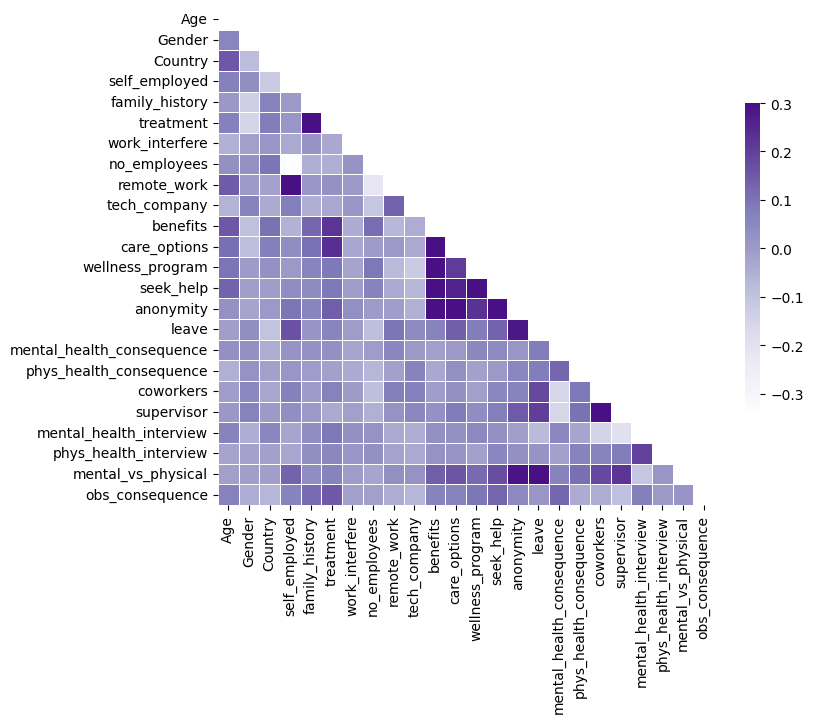

In [16]:
corr = df.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr, mask=mask, cmap='Purples', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [17]:
# Resultado final da base
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,0,44,0,0,1,1,4,0,1,...,2,2,1,1,1,2,1,0,2,0
1,44,1,44,0,0,0,2,5,0,0,...,0,0,0,1,0,0,1,1,0,0
2,32,1,6,0,0,0,2,4,0,1,...,0,1,1,1,2,2,2,2,1,0
3,31,1,43,0,1,1,1,2,0,1,...,1,1,2,2,1,0,0,0,1,1
4,31,1,44,0,0,0,0,1,1,1,...,0,0,1,1,1,2,2,2,0,0


# Divisão da base em teste e treino

Etapa necessária para rodar todos os algoritmos, a base foi dividida em treino e teste e a quantidade em cada é apresentada.

In [18]:
yvalues = df["treatment"]
xvalues = df.drop("treatment", axis = 1)

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(xvalues, yvalues, test_size=0.2, random_state=123, stratify = yvalues)
print(xvalues.shape)
print(yvalues.shape)

(1251, 23)
(1251,)


In [20]:
yvalues.value_counts()

treatment
1    632
0    619
Name: count, dtype: int64

In [21]:
ytrain.value_counts()

treatment
1    505
0    495
Name: count, dtype: int64

In [22]:
ytest.value_counts()

treatment
1    127
0    124
Name: count, dtype: int64

# RandomForestClassifier

Utilizou-se o GridSearch para definir os hiperparâmetros.

In [23]:
params = { 'max_features': ['sqrt', 'log2', 0.2, 0.4, 0.6, 0.8, 1],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}

GSRF_model = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, cv= 5, n_jobs=5)
GSRF_model.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=5,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2', 0.2, 0.4, 0.6, 0.8,
                                          1]})

              precision    recall  f1-score   support

           0       0.96      0.69      0.80       124
           1       0.76      0.97      0.85       127

    accuracy                           0.83       251
   macro avg       0.86      0.83      0.83       251
weighted avg       0.86      0.83      0.83       251



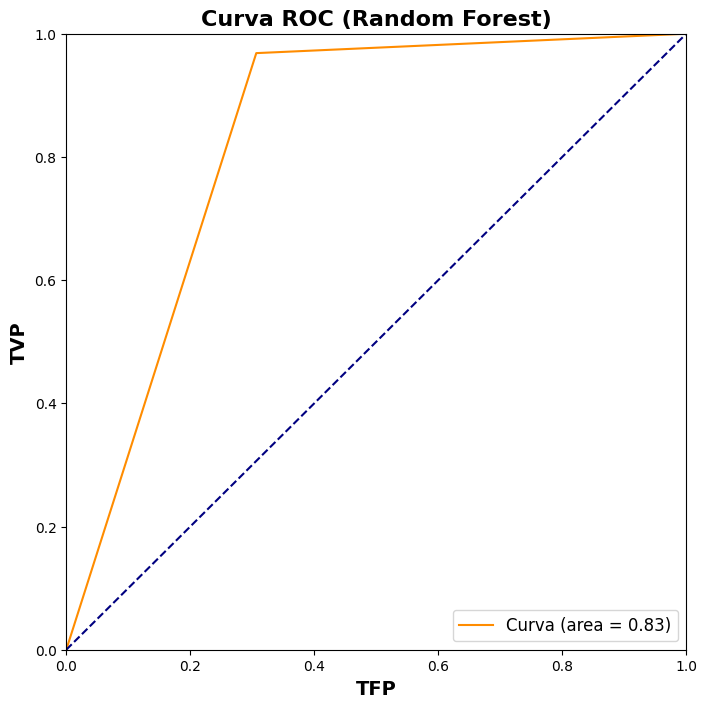

In [24]:
pred = GSRF_model.predict(xtest)
print(classification_report(ytest, pred))
fpr, tpr, thresholds = roc_curve(ytest, pred)
plt.figure(figsize=(8,8))
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='Curva (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('Curva ROC (Random Forest)', fontweight = 'bold', fontsize=16)
plt.xlabel('TFP', fontweight = 'bold', fontsize=14)
plt.ylabel('TVP', fontweight = 'bold', fontsize=14)
plt.legend(loc="lower right")
plt.show()

# XGBRFClassifier

Variação do XGBoost que utiliza RandomForest.

In [25]:
XGBR_model = XGBRFClassifier()
XGBR_model.fit(xtrain, ytrain)

c:\Users\augus\.conda\envs\IA\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\augus\.conda\envs\IA\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\augus\.conda\envs\IA\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\augus\.conda\envs\IA\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_catego

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, reg_alpha=None, ...)

c:\Users\augus\.conda\envs\IA\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\augus\.conda\envs\IA\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\augus\.conda\envs\IA\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\augus\.conda\envs\IA\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_catego

              precision    recall  f1-score   support

           0       0.89      0.73      0.80       124
           1       0.77      0.91      0.84       127

    accuracy                           0.82       251
   macro avg       0.83      0.82      0.82       251
weighted avg       0.83      0.82      0.82       251



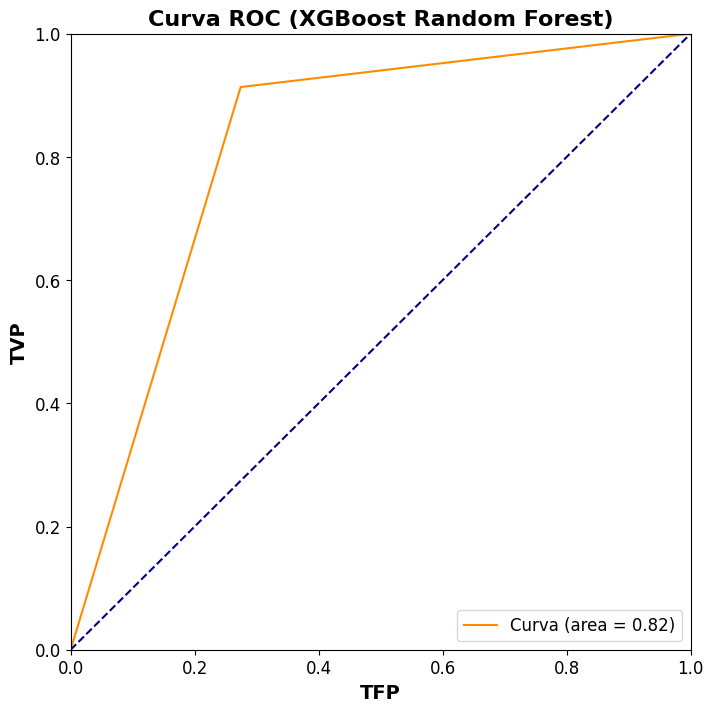

In [26]:
pred= XGBR_model.predict(xtest)
print(classification_report(ytest, pred))
fpr, tpr, thresholds = roc_curve(ytest, pred)
plt.figure(figsize=(8,8))
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='Curva (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('Curva ROC (XGBoost Random Forest)', fontweight = 'bold', fontsize=16)
plt.xlabel('TFP', fontweight = 'bold', fontsize=14)
plt.ylabel('TVP', fontweight = 'bold', fontsize=14)
plt.legend(loc="lower right")
plt.show()

# DecisionTreeClassifier

Utilizou-se o GridSearch para definir os hiperparâmetros.

In [27]:
params = {'criterion':  ['gini', 'entropy'],
          'max_depth':  [None, 2, 4, 6, 8, 10],
          'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8]}

RSDT_model =  GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, cv= 5, n_jobs=5)
RSDT_model.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=5,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 6, 8, 10],
                         'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6,
                                          0.8]})

              precision    recall  f1-score   support

           0       0.96      0.69      0.80       124
           1       0.76      0.97      0.85       127

    accuracy                           0.83       251
   macro avg       0.86      0.83      0.83       251
weighted avg       0.86      0.83      0.83       251



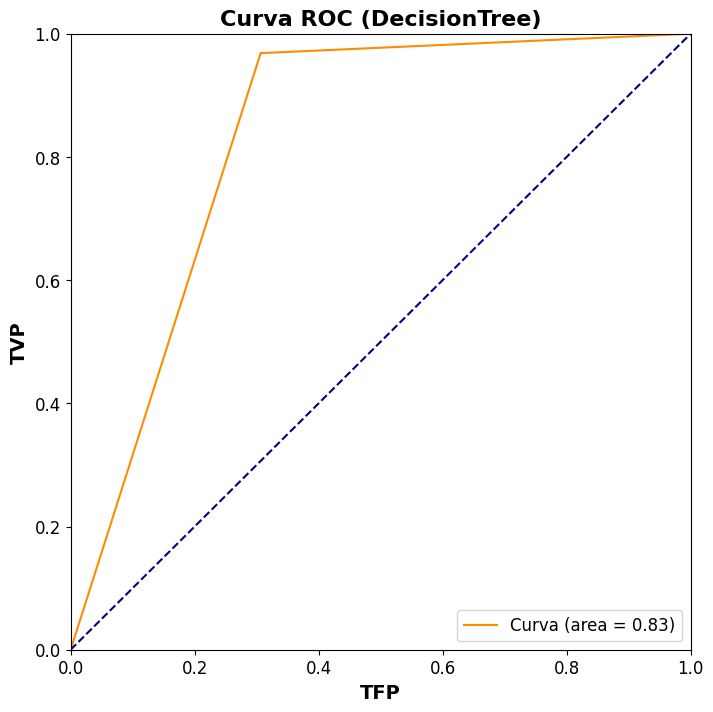

In [28]:
pred= RSDT_model.predict(xtest)
print(classification_report(ytest, pred))
fpr, tpr, thresholds = roc_curve(ytest, pred)
plt.figure(figsize=(8,8))
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='Curva (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('Curva ROC (DecisionTree)', fontweight = 'bold', fontsize=16)
plt.xlabel('TFP', fontweight = 'bold', fontsize=14)
plt.ylabel('TVP', fontweight = 'bold', fontsize=14)
plt.legend(loc="lower right")
plt.show()

# MultilayerPerceptronClassifier

In [29]:
MLP_model = MLPClassifier()
MLP_model.fit(xtrain, ytrain)

c:\Users\augus\.conda\envs\IA\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       124
           1       0.79      0.75      0.77       127

    accuracy                           0.77       251
   macro avg       0.77      0.77      0.77       251
weighted avg       0.77      0.77      0.77       251



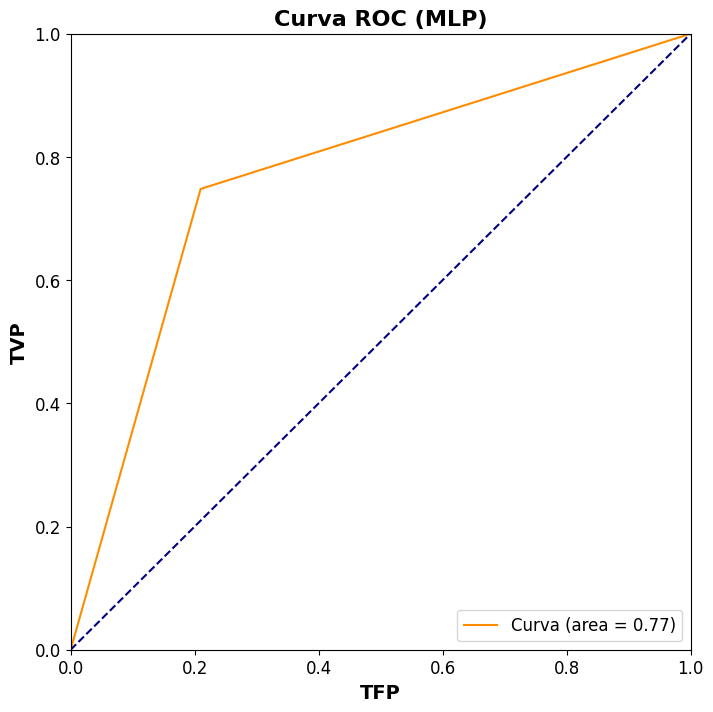

In [30]:
pred = MLP_model.predict(xtest)
print(classification_report(ytest, pred))
fpr, tpr, thresholds = roc_curve(ytest, pred)
plt.figure(figsize=(8,8))
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='Curva (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('Curva ROC (MLP)', fontweight = 'bold', fontsize=16)
plt.xlabel('TFP', fontweight = 'bold', fontsize=14)
plt.ylabel('TVP', fontweight = 'bold', fontsize=14)
plt.legend(loc="lower right")
plt.show()

In [31]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(xtrain, ytrain)

SVC(kernel='linear')

              precision    recall  f1-score   support

           0       0.64      0.75      0.69       124
           1       0.70      0.58      0.64       127

    accuracy                           0.67       251
   macro avg       0.67      0.67      0.66       251
weighted avg       0.67      0.67      0.66       251



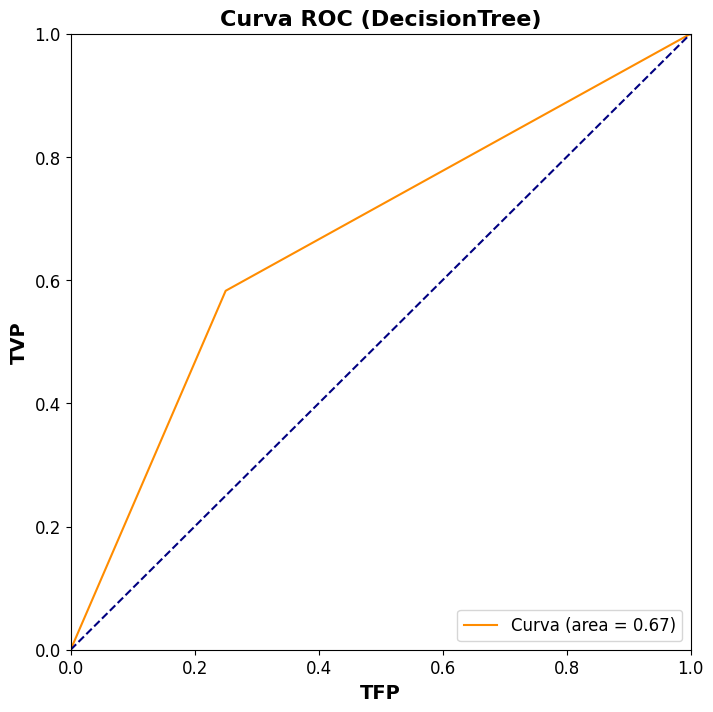

In [32]:
pred= svm_model.predict(xtest)
print(classification_report(ytest, pred))
fpr, tpr, thresholds = roc_curve(ytest, pred)
plt.figure(figsize=(8,8))
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='Curva (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('Curva ROC (DecisionTree)', fontweight = 'bold', fontsize=16)
plt.xlabel('TFP', fontweight = 'bold', fontsize=14)
plt.ylabel('TVP', fontweight = 'bold', fontsize=14)
plt.legend(loc="lower right")
plt.show()